In [13]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import seaborn as sns
import cmocean.cm as cmo
from datetime import datetime, timedelta
# plot styles/formatting
import seaborn as sns
import matplotlib.ticker as mticker
from IPython.display import Image, display

# Path to modules
sys.path.append('../modules')

# Import my modules
from plotter import draw_basemap, add_subregion_boxes, make_cmap
from markovchain import MarkovChain, transition_matrix
from ar_funcs import duration_stats

In [2]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures


In [3]:
ceofid = 'IVT'
neofs = 2 # choose number of eofs
nk = 3 # choose number of clusters
ssn = 'djfmam'

out_path = path_to_out + ceofid + '/' + ssn + '/' + 'neof' + str(neofs) + '/k' + str(nk) + '/'
fig_path = path_to_figs + ceofid + '/' + ssn + '/'+ 'neof' + str(neofs) + '/k' + str(nk) + '/'

In [4]:
def create_P_matrix(ceofid, neofs, nk, ssn, step):
    # open data
    out_path = path_to_out + ceofid + '/' + ssn + '/' + 'neof' + str(neofs) + '/k' + str(nk) + '/'
    filepath = out_path + 'AR-types_ALLDAYS.csv'
    df = pd.read_csv(filepath)

    # run with AR_CAT data
    t = df.AR_CAT.values.tolist()
    m = transition_matrix(t, step)
    for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

    P = np.array(m)*100 # Transition matrix as array, convert to %
    
    return P

In [5]:
P = []
for day in range(1,8):
    print(day)
    tmp = create_P_matrix(ceofid, neofs, nk, ssn, day)
    P.append(tmp)

1
0.75 0.05 0.08 0.13
0.35 0.45 0.02 0.18
0.20 0.24 0.50 0.05
0.41 0.03 0.07 0.49
2
0.65 0.08 0.11 0.16
0.52 0.21 0.05 0.22
0.34 0.28 0.29 0.09
0.50 0.07 0.10 0.33
3
0.61 0.10 0.12 0.17
0.53 0.14 0.08 0.24
0.43 0.24 0.19 0.13
0.54 0.09 0.11 0.26
4
0.61 0.10 0.12 0.17
0.52 0.13 0.10 0.24
0.46 0.20 0.16 0.17
0.55 0.11 0.11 0.24
5
0.60 0.11 0.12 0.18
0.53 0.12 0.13 0.22
0.47 0.18 0.14 0.20
0.56 0.10 0.11 0.23
6
0.59 0.11 0.12 0.17
0.52 0.13 0.14 0.21
0.47 0.16 0.15 0.22
0.57 0.10 0.11 0.22
7
0.59 0.11 0.12 0.18
0.52 0.14 0.13 0.21
0.49 0.15 0.14 0.22
0.57 0.10 0.12 0.21


In [9]:
# get trackIDs
outfile = path_to_out + 'DJFMAM_ARS_TRACKID_explode.csv'
df = pd.read_csv(outfile)

track_ids = df.kidmap.unique()
df

,Unnamed: 0,date,time,kidmap,AR_CAT
0,0,1979-12-01,1979-12-01 12:00:00,2864.0,2
1,1,1979-12-01,1979-12-01 12:00:00,2861.0,2
2,2,1979-12-01,1979-12-01 18:00:00,2864.0,2
3,3,1979-12-01,1979-12-01 18:00:00,2861.0,2
4,4,1979-12-02,1979-12-02 00:00:00,2861.0,1
...,...,...,...,...,...
7815,7815,2019-05-21,2019-05-21 12:00:00,128712.0,1
7816,7816,2019-05-24,2019-05-24 00:00:00,128755.0,3
7817,7817,2019-05-25,2019-05-25 00:00:00,128763.0,3
7818,7818,2019-05-25,2019-05-25 12:00:00,128756.0,3


In [12]:
# create df with trackID, ar_cat, start date, end date, and duration of AR
ar = []
data = []
for i in [1, 2, 3]:
    idx = (df.AR_CAT == i)
    ar = df.loc[idx]

    for j, ids in enumerate(track_ids):
        idx = (ar.kidmap == ids)
        tmp = ar.loc[idx]
        start = pd.to_datetime(tmp.time.min())
        stop = pd.to_datetime(tmp.time.max()) + timedelta(hours=6)
        tmp = (stop - start)
        duration = tmp.total_seconds()/(3600) # convert to number of hours

        data.append([ids, i, start, stop, duration])
    
duration_df = pd.DataFrame(data, columns=['trackID', 'ar_cat', 'start_date', 'end_date', 'duration'])
duration_df = duration_df.dropna()
duration_df

,trackID,ar_cat,start_date,end_date,duration
1,2861.0,1,1979-12-02 00:00:00,1979-12-02 18:00:00,18.0
2,2871.0,1,1979-12-09 06:00:00,1979-12-09 18:00:00,12.0
3,2975.0,1,1979-12-16 12:00:00,1979-12-17 00:00:00,12.0
4,2988.0,1,1979-12-21 00:00:00,1979-12-22 12:00:00,36.0
5,3026.0,1,1979-12-24 06:00:00,1979-12-24 12:00:00,6.0
...,...,...,...,...,...
6824,128613.0,3,2019-05-06 06:00:00,2019-05-06 12:00:00,6.0
6825,128655.0,3,2019-05-12 06:00:00,2019-05-12 12:00:00,6.0
6830,128755.0,3,2019-05-24 00:00:00,2019-05-24 06:00:00,6.0
6831,128763.0,3,2019-05-25 00:00:00,2019-05-25 06:00:00,6.0


In [19]:
bins = np.array([[0, 24], [24, 2*24], [2*24, 3*24], [3*24, 4*24], [4*24, 5*24], [5*24, 6*24], [6*24, 7*24]])
sizes = []
freqs = []

for i in [1, 2, 3]:
    idx = (duration_df.ar_cat == i)
    tmp = duration_df.loc[idx]

    size, freq = duration_stats(tmp.duration, bins)
    sizes.append(size)
    freqs.append(freq)

size_all, freq_all = duration_stats(duration_df.duration, bins) 
nevents = len(duration_df.trackID)

/home/nash/DATA/repositories/AR_types/figs/IVT/djfmam/neof2/k3/fig5_transition_heatmap.png


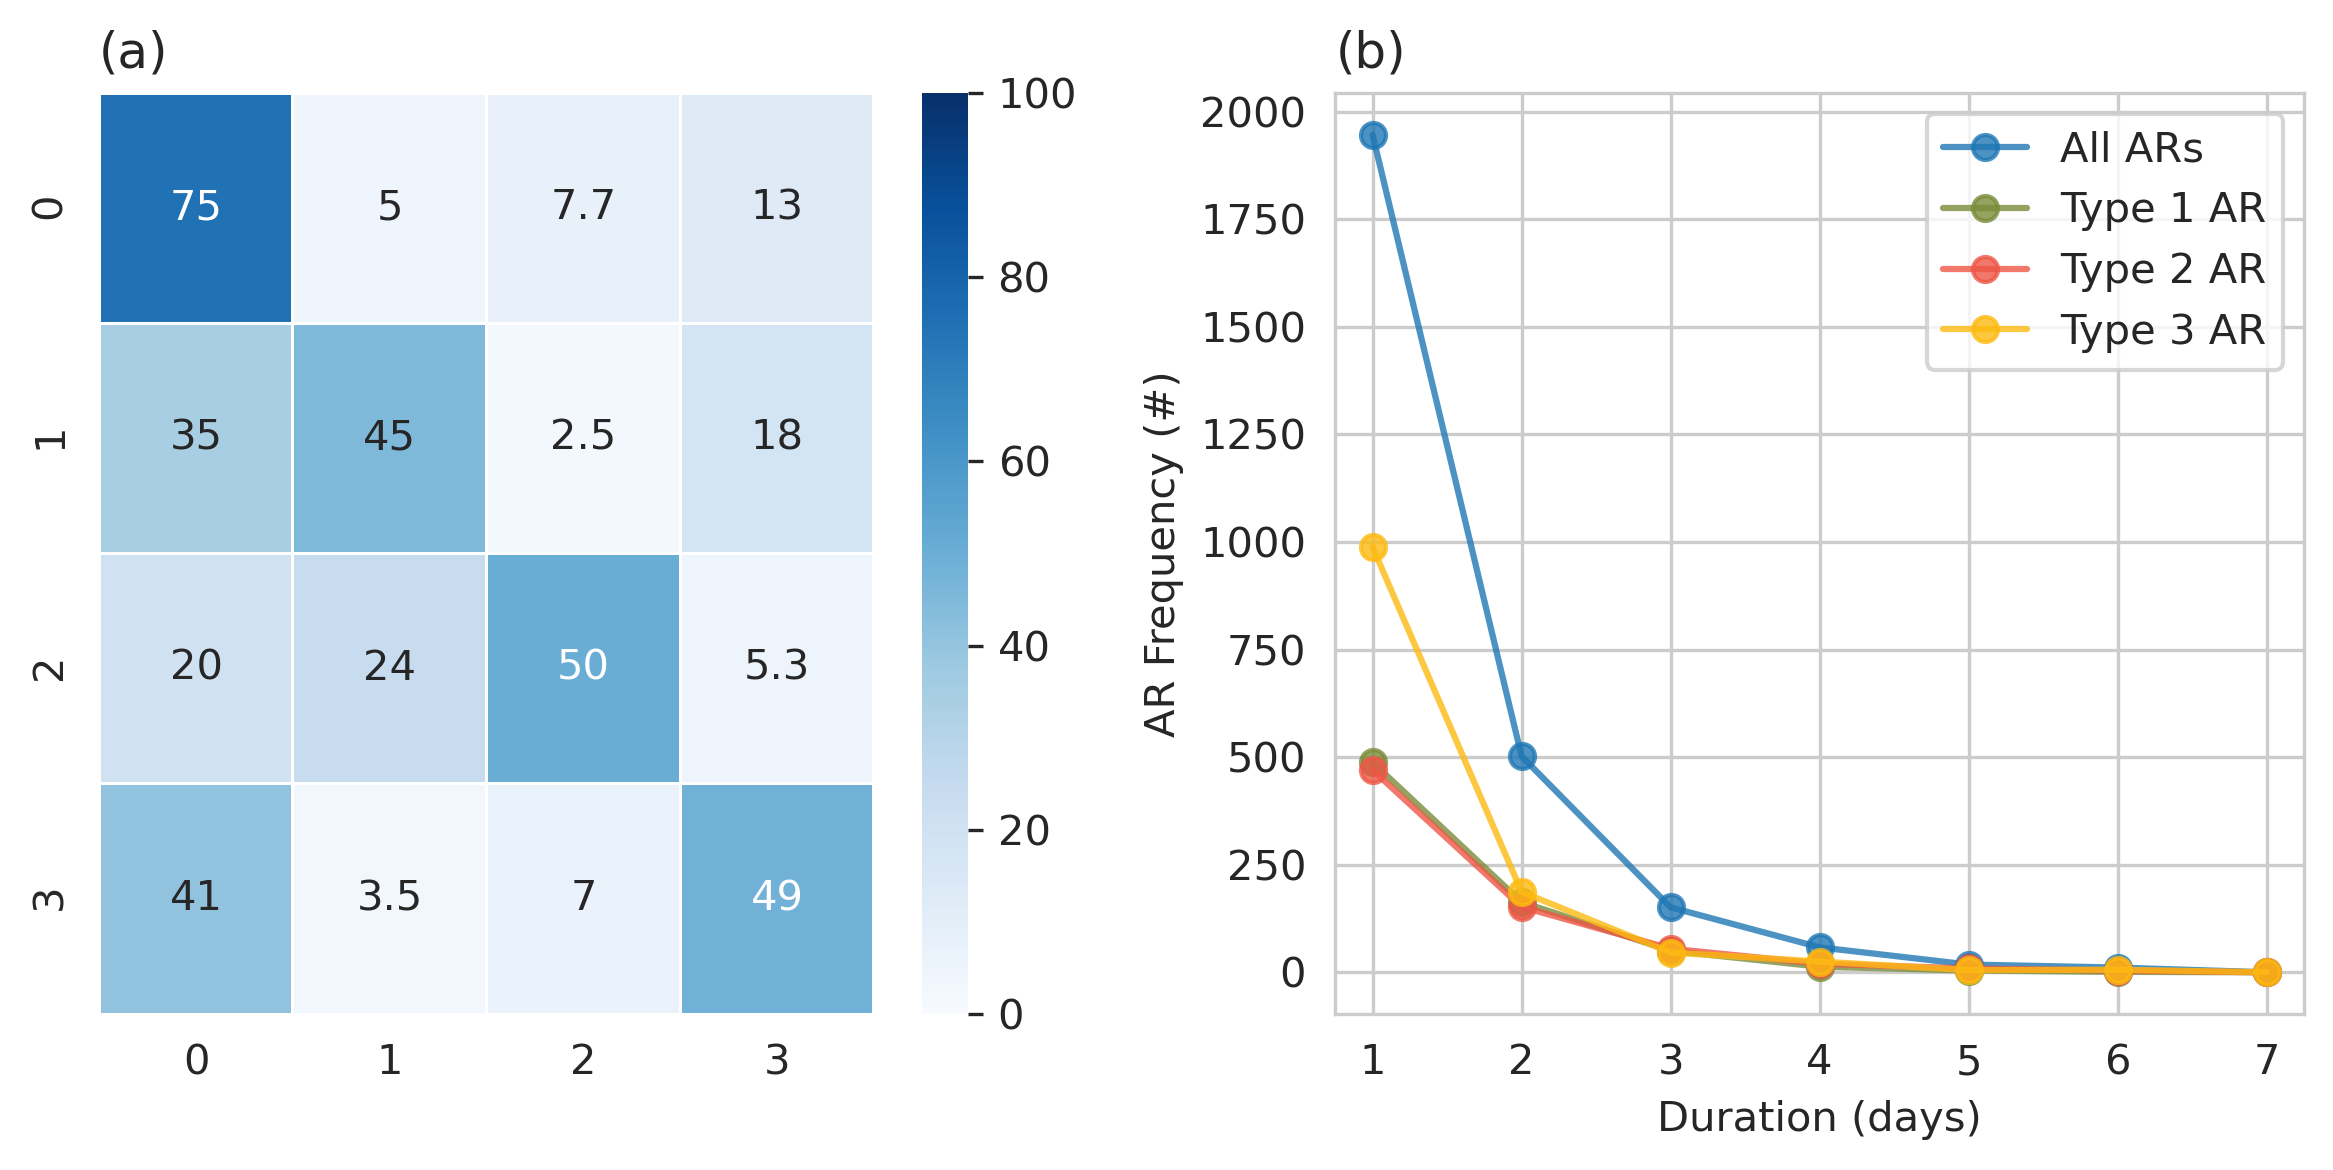

In [26]:
colors = np.array(([122/256, 141/256, 57/256, 1], # green
                   [239/256, 86/256, 69/256, 1],  # coral
                   [254/256, 188/256, 17/256, 1]))  # gold

sns.set_style("whitegrid")

fname = fig_path + 'fig5_transition_heatmap'
fmt = 'png'

plt_labels = ['(a)', '(b) 2-day', '(c) 5-day']
fig = plt.figure()
fig.set_size_inches((12.,4.))
fig.dpi = 300
nrows = 1
ncols = 3
nplots = nrows*ncols

cmap = "YlGnBu"
cmap = "Blues"
for i, step in enumerate([1]):
    ax = plt.subplot(nrows, ncols, i+1)
    Pround = np.round(P[step-1], 2) # Round decimals to two places
    g = sns.heatmap(Pround, vmin=0, vmax=100, annot=True, linewidths=.5, cmap=cmap)
    plt.title(plt_labels[i], fontsize=12, loc='left')

# ax = fig.add_subplot(nrows, ncols, 2)

# # plot data
# xvals = np.arange(1, 8, 1)
# ax.plot(xvals, freq_all,'o-', color='tab:blue', alpha=0.8, label='All ARs')
# ax.plot(xvals, freqs[0],'o-', color=colors[0], alpha=0.8, label='Type 1 AR')
# ax.plot(xvals, freqs[1],'o-', color=colors[1], alpha=0.8, label='Type 2 AR')
# ax.plot(xvals, freqs[2],'o-', color=colors[2], alpha=0.8, label='Type 3 AR')

# # x-axis
# ax.set_xlabel('Duration (days)')
# ax.set_xticks(xvals)

# # y-axis
# ax.set_ylabel('AR Frequency (%)')
# # ax.set_yticks(np.arange(0, 21, 3))
# ax.set_title('(b)', loc='left', fontsize=12,)

# ax.legend()

ax2 = fig.add_subplot(nrows, ncols, 2)

# plot data
xvals = np.arange(1, 8, 1)
ax2.plot(xvals, size_all,'o-', color='tab:blue', alpha=0.8, label='All ARs')
ax2.plot(xvals, sizes[0],'o-', color=colors[0], alpha=0.8, label='Type 1 AR')
ax2.plot(xvals, sizes[1],'o-', color=colors[1], alpha=0.8, label='Type 2 AR')
ax2.plot(xvals, sizes[2],'o-', color=colors[2], alpha=0.8, label='Type 3 AR')

# x-axis
ax2.set_xlabel('Duration (days)')
ax2.set_xticks(xvals)
ax2.set_xlim(0.75, 7.25)

# y-axis
ax2.set_ylabel('AR Frequency (#)')
# ax.set_yticks(np.arange(0, 21, 3))
ax2.set_title('(b)', loc='left', fontsize=12)
# ax2.set_ylim(-0.5, 2000)

ax2.legend()

plt.tight_layout()
# plt.show()

fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=300)

plotFile = fname + '.png'
print(plotFile)

/home/nash/DATA/repositories/AR_types/figs/IVT/djfmam/neof2/k3/fig5_transition_matrix.png


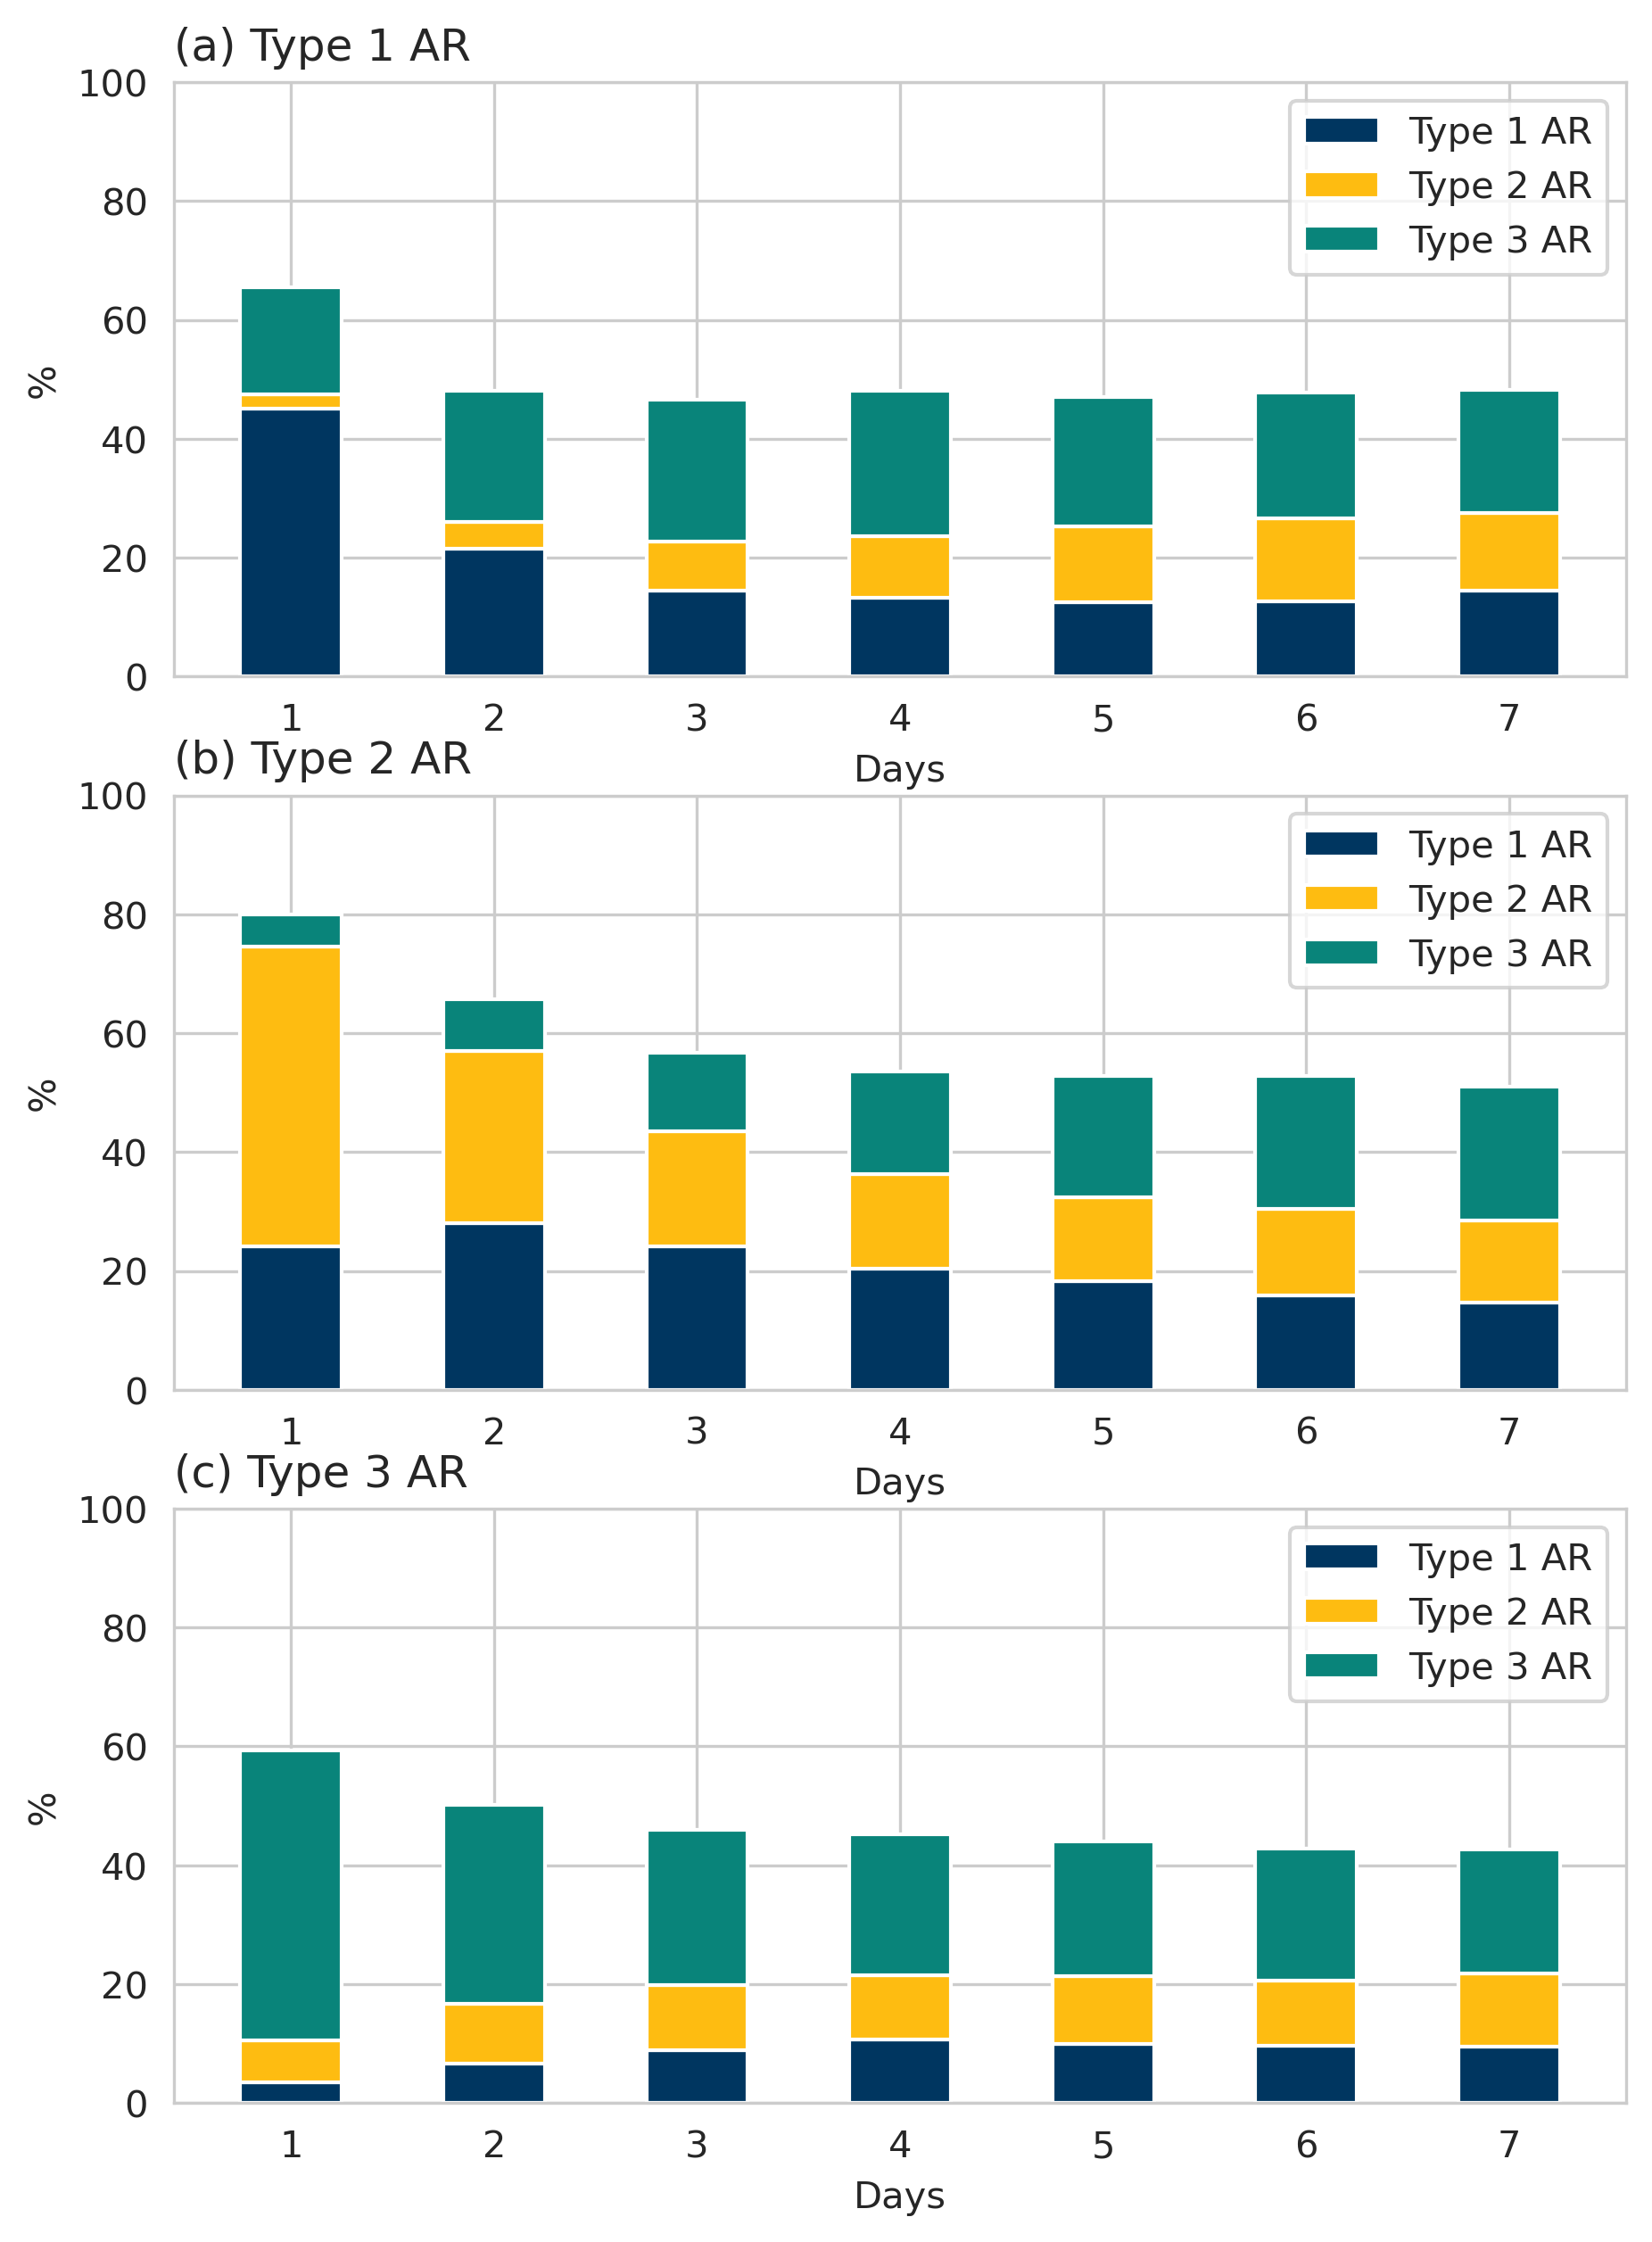

<Figure size 2100x3000 with 0 Axes>

In [10]:
fname = fig_path + 'fig5_transition_matrix'
fmt = 'png'

fig = plt.figure()
fig.set_size_inches((7.,10.))
fig.dpi = 300
nrows = 3
ncols = 1
nplots = nrows*ncols
ndays = 7
plt_lbl = ['(a) Type 1 AR', '(b) Type 2 AR', '(c) Type 3 AR']
sns.set_style("whitegrid")

for k in range(nrows):
    ax = plt.subplot(nrows, ncols, k+1)

    # transition from state 1 to state 0
    greyBars = [P[i][k+1, 0] for i in range(ndays)]
    # transition from state 1 to state 1
    greenBars = [P[i][k+1, 1] for i in range(ndays)]
    # transition from state 1 to state 2
    orangeBars = [P[i][k+1, 2] for i in range(ndays)]
    # transition from state 1 to state 3
    blueBars = [P[i][k+1, 3] for i in range(ndays)]

    # plot
    barWidth = 0.5
    r = range(ndays)
    names = ('1','2','3','4','5', '6', '7')
    # ["#003660", "#FEBC11", "#09847A"] # navy, gold, sea green
    # Create green Bars
    ax.bar(r, greenBars, color="#003660", edgecolor='white', width=barWidth, label='Type 1 AR')
    # Create orange Bars
    ax.bar(r, orangeBars, bottom=greenBars, color="#FEBC11", edgecolor='white', width=barWidth, label='Type 2 AR')
    # Create blue Bars
    ax.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color="#09847A", edgecolor='white', width=barWidth, label='Type 3 AR')
#     # Create grey Bars
#     ax.bar(r, greyBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], color='#D3D3D3', edgecolor='white', width=barWidth, alpha=0.2)

    ax.set_xlabel("Days")
    ax.set_ylabel("%")
    ax.set_ylim(0, 100)
    # Custom x axis
    plt.xticks(r, names)
    ax.set_title(plt_lbl[k], loc='left')
    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)

 

    ## Save the figure
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=fig.dpi)
fig.clf()

plotFile = fname + '.png'
print(plotFile)
display(Image(plotFile))

In [8]:
# ssn='djf'
# mc = MarkovChain(P1, ['None', '1', '2', '3'])
# # save plot
# filepath = path_to_figs + ssn + '_markov'+ '.png'
# mc.draw(img_path=filepath)